# NLP On Rap Lyrics

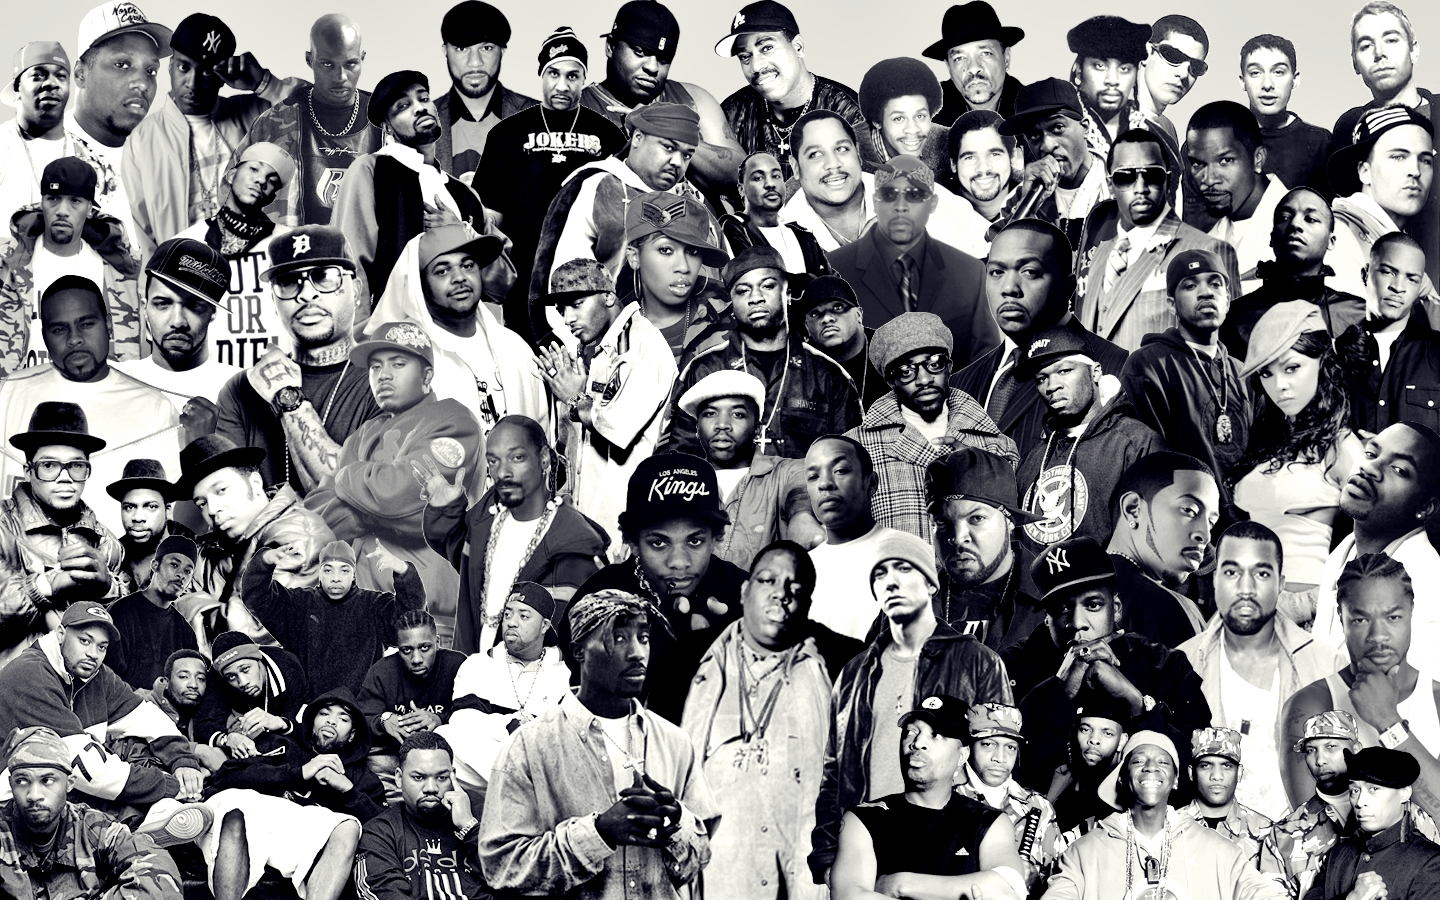

In [1]:
from IPython.display import Image
Image(filename=r'C:\Users\tomer\Desktop\rappers.jpg')

At this project, I focused on natural language processing (NLP) techniques and unsupervised learning. \
I'm going to use NLP to analyze a large list of rap artists by their song lyrics and try to find interesting insights. \
I chose to focus on rap music because, unlike some other type of music like jazz, electronic, or even pop, \
rap music heavily relying on lyrics so NLP techniques can be useful. 

In addition, I will try to build a Recommendation System that takes a rapper name input from the user receives \
recommendations of 5 other rappers that the user might be love as well base on "rappers closeness" in terms of lyrics.

## Import Libraries
 - import relevat libraries.
 
## Getting + Cleaning The Data

In this section we are going to:
 - Import the data. 
 - Clean the data round 1.
 - Organizing the data. 
 - Clean the data round 2. 

## Exploratory Data Analysis

Here we are try to answer:
 - Which rapper swears the most? 
 - Which rappers use the largest vocabulary? 
 - What are the most common words? 

And do a visualization with word cloud 

## Sentiment Analysis

In this part we will see which rapper are more positive and which are negative.

## Recommendation System

 - The model. 
 - Preprocessing.
 - How to check if it is a good result?


# Libraries

In [2]:
import re 
import os
import pandas as pd
import numpy as np
import pickle
import string

import lyricsgenius as genius
from bs4 import BeautifulSoup
import requests

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.metrics.pairwise import cosine_similarity

from nltk.stem.snowball import SnowballStemmer

from textblob import TextBlob

from wordcloud import WordCloud
from matplotlib import pyplot as plt
%matplotlib inline

# Getting + Cleaning The Data

first, I need to build a list of good rap artists and for that i used these websites to find the best rapper of all time:

https://www.ranker.com/ \
https://www.billboard.com/ \
https://www.cleveland.com/ \
https://genius.com/

According to thise websits, I took the best 149 rappers and put them in a list `artist_list`.

Then, i need to create my own dataset that containes the all the rappers and thier songs.
In order to pull all this data, I needed to web scrape reliable lyrics website. After a quick search i found the `lyricsgenius` package which provides a simple interface to the song, artist, and lyrics data stored on [Genius.com](Genius.com).
The packege created by John W. Miller and the full documentation for lyricsgenius is available online at his [GitHub](https://github.com/johnwmillr/LyricsGenius). \
[Here is a link](https://towardsdatascience.com/song-lyrics-genius-api-dcc2819c29) to a nice tutorial how to open an account in Genius API and how to work with the `lyricsgenius` packege. 
Here I import for each rapper in my list his best 50 songs (According to Genius) lyrics.

**NOTE:** if they have less than 50 songs it takes all the songs.

In [3]:
token = "xl1BW3PwBegMQdUZDljLjnhTGhORjXD-Lo4B0w5nza-T73-ZAfUfz1hEVvqalLuT"

api = genius.Genius(token,verbose=False)

artist_list = ['2Pac', 'The Notorious B.I.G.', 'Drake', 'Dr. Dre', 'Kanye West', 'Ti', 'Lil Wayne', 'Ice Cube', 'Eminem', 'Jayz','Nas',
               'Kendrick Lamar', 'Snoop Dogg', 'NF', 'Nicki Minaj', 'Tyga', 'Rick Ross', 'Fat Joe', 'Missy Elliott',
               'Lil Kim', '50 Cent', 'Lil Jon', "André 3000", 'Rakim', 'J. Cole', 'LL Cool J', 'Travis Scott', 'Ludacris',
               'DMX', 'Busta Rhymes', 'Diddy', 'Tech N9ne', 'Logic', 'The Game', 'Xzibit', 'Eazy E', 'Ice T', 'Wiz Khalifa',
               'XXXTentacion', 'Kid Cudi', 'Childish Gambino', "Royce da 5'9", 'Tyler, the Creator', 'ASAP Rocky', 'Nate Dogg',
               'Juice WRLD', 'Mac Miller', 'Chance the Rapper', 'Big Sean', 'Pusha T', 'Ghostface Killah', 'Joyner" Lucas',
               'Joey Bada$$', 'Denzel Curry', 'Lil Uzi Vert', '2 Chainz', 'Guru', '21 Savage', 'Schoolboy Q', 'MF Doom',
               'Future', 'Method Man', 'Nelly', 'Polo G', 'Prodigy', 'A$AP Ferg', 'Meek Mill', 'Roddy Ricch', 'Gucci Mane',
               'Lil Baby', 'DaBaby', 'Ice-T', 'Chief Keef', 'Warren G', 'Post Malone', 'Twista', 'Hopsin', 'Big L', 'T-Pain',
               'MC Ren', "Ol' Dirty Bastard", 'Lil Dicky', 'J.I.D', 'Young Thug', 'Big Pun', 'Redman', 'Quavo', 'RZA', 'YG',
               'E-40', 'Coolio', 'G-Eazy', 'Juicy J', 'Raekwon', 'Scarface', 'Proof', 'Big Boi', 'Q-Tip', 'Too $hort', 'Lloyd Banks',
               'Jeezy', 'Fabolous', 'Pharrell Williams', 'AZ', 'MC Hammer', 'Inspectah Deck', 'Queen Latifah', 'Krayzie Bone', 'will.i.am',
               'Heavy D', 'Killer Mike', 'Eve', "Cam'ron", 'Flo Rida', 'Bun B', 'Q-Tip', 'Talab Kweli', 'Common', 'Jadakiss',
               'Ja Rule' , 'Lupe Fiasco', 'Black Thought', 'Ghostface Killah', 'Bizzy Bone', 'Immortal Technique', 'KRS-One',
               'GZA', 'Pimp C', 'Boosie Badazz', 'Slick Rick', 'ODB', 'Brother Ali', 'Mos Def', 'Yelawolf' , 'Masta Ace',
               'Big Krit', 'Juicy-J', 'Apathy', 'Earl Sweatshirt', 'Paul Wall', 'Kool Keith', 'Ab-Soul', 'Rittz', 'Slug', 'Chuck D',
               'B-Real', 'Lauryn Hill', 'Freddie Gibbs', 'B.o.B', 'Macklemore', 'Treach']

In [4]:
def clean_text(text):
    text = str(text)
    text = os.linesep.join([s for s in text.splitlines() if s])
    
    # Converts all uppercase into lowercase
    text = text.lower()
    
    # Remove non-lyrics text
    text = text.replace("\r\n"," ").replace("\'","").replace("\n"," ").replace("\'n\'"," ")
    text = re.sub("[\(\[].*?[\)\]]", "", text)
    
    # Remove extra spaces
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    # Remove punctuation
    for p in string.punctuation:
        text = text.replace(p, "")
        
    # Remove numbers
    text = re.sub(r"\d+", "", text)

    return text

In [ ]:
for artist_name in artist_list:
    artist = api.search_artist(artist_name, max_songs=50, get_full_info=False)
    artist.save_lyrics(artist_name +".json")

In [5]:
# Same list with corrections like non '-' or non '$' in the name.
artist_list = ['2Pac', 'The Notorious B.I.G.', 'Drake', 'Dr. Dre', 'Kanye West', 'Ti', 'Lil Wayne', 'Ice Cube', 'Eminem', 'Jayz','Nas',
               'Kendrick Lamar', 'Snoop Dogg', 'NF', 'Nicki Minaj', 'Tyga', 'Rick Ross', 'Fat Joe', 'Missy Elliott',
               'Lil Kim', '50 Cent', 'Lil Jon', "André 3000", 'Rakim', 'J. Cole', 'LL Cool J', 'Travis Scott', 'Ludacris',
               'DMX', 'Busta Rhymes', 'Diddy', 'Tech N9ne', 'Logic', 'The Game', 'Xzibit', 'Eazy E', 'Ice T', 'Wiz Khalifa',
               'XXXTentacion', 'Kid Cudi', 'Childish Gambino', "Royce da 59", 'Tyler the Creator', 'ASAP Rocky', 'Nate Dogg',
               'Juice WRLD', 'Mac Miller', 'Chance the Rapper', 'Big Sean', 'Pusha T', 'Ghostface Killah', 'Joyner Lucas',
               'Joey Bada', 'Denzel Curry', 'Lil Uzi Vert', '2 Chainz', 'Guru', '21 Savage', 'Schoolboy Q', 'MF Doom',
               'Future', 'Method Man', 'Nelly', 'Polo G', 'Prodigy', 'AAP Ferg', 'Meek Mill', 'Roddy Ricch', 'Gucci Mane',
               'Lil Baby', 'DaBaby', 'IceT', 'Chief Keef', 'Warren G', 'Post Malone', 'Twista', 'Hopsin', 'Big L', 'TPain',
               'MC Ren', "Ol Dirty Bastard", 'Lil Dicky', 'J.I.D', 'Young Thug', 'Big Pun', 'Redman', 'Quavo', 'RZA', 'YG',
               'E40', 'Coolio', 'GEazy', 'Juicy J', 'Raekwon', 'Scarface', 'Proof', 'Big Boi', 'QTip', 'Too hort', 'Lloyd Banks',
               'Jeezy', 'Fabolous', 'Pharrell Williams', 'AZ', 'MC Hammer', 'Inspectah Deck', 'Queen Latifah', 'Krayzie Bone', 'will.i.am',
               'Heavy D', 'Killer Mike', 'Eve', "Camron", 'Flo Rida', 'Bun B', 'QTip', 'Talab Kweli', 'Common', 'Jadakiss',
               'Ja Rule' , 'Lupe Fiasco', 'Black Thought', 'Ghostface Killah', 'Bizzy Bone', 'Immortal Technique', 'KRSOne',
               'GZA', 'Pimp C', 'Boosie Badazz', 'Slick Rick', 'ODB', 'Brother Ali', 'Mos Def', 'Yelawolf', 'Masta Ace',
               'Big Krit', 'JuicyJ', 'Apathy', 'Earl Sweatshirt', 'Paul Wall', 'Kool Keith', 'AbSoul', 'Rittz', 'Slug', 'Chuck D',
               'BReal', 'Lauryn Hill', 'Freddie Gibbs', 'B.o.B', 'Macklemore', 'Treach']

In [6]:
df = {}

for artist_name in artist_list:
    with open(artist_name +".json") as json_data:
        Artist = json.load(json_data)
        
        artist_lyrics = []
        for i in range(len(Artist['songs'])):
            artist_lyrics.append(clean_text(Artist['songs'][i]['lyrics']))

        df[artist_name] = str(artist_lyrics)

Combine all to one function.

In [ ]:
def get_lyrics(artist_list,max_songs=5):  
    data = {}
    
    for artist_name in artist_list:
        artist = api.search_artist(artist_name, max_songs=max_songs, get_full_info=False)
        artist.save_lyrics(artist_name +".json")
        
    # Reading the json as a dict
    for artist_name in artist_list:
        with open(artist_name +".json") as json_data:
            Artist = json.load(json_data)
            
            artist_lyrics = []
            for i in range(max_songs):
                artist_lyrics.append(clean_text(Artist['songs'][i]['lyrics']))
            
            data[artist_name] = artist_lyrics
            
    return data

In [ ]:
%%time
df = get_lyrics(artist_list,max_songs = 50)

# Organizing The Data

### Convert into Data Frame

In [7]:
# convert to data frame        
data = pd.DataFrame.from_dict(df, orient='index',dtype='str', columns = ['lyrics'])
data['name'] = data.index
data

,lyrics,name
2Pac,[' suckaass i aint got no motherfuckin friends...,2Pac
The Notorious B.I.G.,[' yeah this album is dedicated to all the te...,The Notorious B.I.G.
Drake,[' and they wishin and wishin and wishin and w...,Drake
Dr. Dre,[' yall know me still the same og but i been l...,Dr. Dre
Kanye West,[' well it is a weepin and a moanin and a gnas...,Kanye West
...,...,...
Lauryn Hill,[' yo remember back on the bully when cats use...,Lauryn Hill
Freddie Gibbs,[' east side niggas stay bout it west side nig...,Freddie Gibbs
B.o.B,[' already got one rolled up in my left hand p...,B.o.B
Macklemore,[' you know im back like i never left another...,Macklemore


# Cleaning The Data Round 2

After a quick look, I notice a few issues like: 
- Square brackets at the beginning and the end. 
- Chinese characters and other non-eiglish letters.
- Words with repeating letters like "aaaaah" or "yooo" etc.
- Common "rap words" like "yo", "aah", "yea" etc, which give no information.

So a second round of cleaning is necessary.

In [8]:
def clean_text_round2(text):    
    # remove "[" and "]" and "," from the appending operation earlier
    for p in string.punctuation:
        text = text.replace(p, "")

    # remove non-English letters (like Chinese characters)
    text = re.sub("([^\x00-\x7F])+"," ",text)
    
    
    # remove word with repeating letters like "aaaaah" or "yooo" etc.
    prev = None
    words = [w for w in text]
    counter = 1
    new = []
    for l in words:
        if l==prev:
            counter+=1
        else:
            if (counter==2):
                new.append(prev)
            counter=1
            new.append(l)
            prev = l
    text = ''.join(new)
    
    # remove common "rap words" like "yo", "aah", "yea" etc.
    word_to_drop = ['yy', 'ye', 'yee', 'ya', 'yaa', 'yea', 'yae','yeaa', 'oh', 'ooh',
     'ho', 'hoo', 'oo', 'yo', 'yoo', 'ah', 'aah', 'ahh', 'aa']
    
    for word in word_to_drop:
         text = text.replace(word,'')
        
    return text

In [9]:
data['lyrics'] = data['lyrics'].apply(clean_text_round2)

In [10]:
# Save the data frame

data.to_pickle("data.pkl")

In [11]:
data = pd.read_pickle('data.pkl')

### Document-Term Matrix

In [12]:
# Creating a document-term matrix using CountVectorizer, and exclude common English stop words like "a" , "the" etc.

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data.lyrics)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data.index
data_dtm

,ab,aback,abacus,abadeabade,abandand,abandon,abandoned,abandonment,abate,abaybay,...,zuzuzu,zuzuzuzuzu,zvie,zvier,zwap,zwei,zxltrxn,zygote,zyklonb,zz
2Pac,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The Notorious B.I.G.,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Drake,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dr. Dre,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kanye West,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lauryn Hill,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Freddie Gibbs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B.o.B,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Macklemore,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Exploratory Data Analysis

in this part we will try to answer:

- Which rapper swears the most?
- Which rappers use the largest vocabulary?
- What are the most common words? and do a visualization with word cloud.

## Which rapper swears the most?

Im using a technique called stemming to converts words like: "eat", "eats", "eating", "ate" into "eat".
Thus, they are all considered the same word, instead of four different words.

In [13]:
from nltk.stem.snowball import SnowballStemmer
data2 = data.copy()
stemmer= SnowballStemmer(language = 'english')

data2['lyrics'] = data2['lyrics'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))

In [14]:
# Create another document-term matrix with the new stemming data.

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data2.lyrics)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data2.index


Create a list with curses and find how many curses each rapper cursing.

In [15]:
s_words = ['nigga','niggas', 'nigger', 'niggers', 'fuck', 'fuckin', 'fucking', 'motherfucker','motherfuckers','motherfuck',
           'motherfuckin','shit', 'bitch', 'bitches', 'slut', 'whore', 'cunt', 'ass', 'suckaass', 'suck','dick', 'pussy']

new_s_words = []
for i in s_words:
    if i in data_dtm.columns:
        new_s_words.append(i)

In [16]:
data_dtm[new_s_words]

,nigga,nigger,fuck,fuckin,motherfuck,motherfuckin,shit,bitch,bitches,slut,cunt,ass,suck,dick
2Pac,424,0,82,25,96,28,99,127,0,2,0,27,0,7
The Notorious B.I.G.,333,1,220,50,161,26,215,221,0,2,0,67,19,52
Drake,214,0,99,35,5,0,179,37,0,0,0,21,1,5
Dr. Dre,418,0,203,66,70,94,182,172,0,1,0,46,8,42
Kanye West,194,0,63,53,16,14,99,71,0,0,0,39,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lauryn Hill,3,0,4,0,0,0,11,1,0,0,0,2,2,0
Freddie Gibbs,711,0,181,18,53,39,166,305,0,1,0,38,10,17
B.o.B,114,0,101,15,9,1,115,90,0,1,0,28,1,10
Macklemore,1,0,40,2,7,1,69,22,0,1,0,7,5,12


In [17]:
data_dtm[new_s_words].sum(axis=1).sort_values(ascending = False)

MC Ren         2384
YG             2209
Too hort       1759
Eazy E         1749
The Game       1706
               ... 
Lauryn Hill      23
Treach           20
MC Hammer        13
André 3000        4
NF                1
Length: 149, dtype: int64

In the next chart we can see the 20 most cursing rappers.
We can notice that MC Ren and YG are the rappers how curse the most (by far) with 2,384 and 2,209 respectively.
Right after them we could see Tyga, The Game, Eazy E and Too $hort. 
Also big names like Dr. Dre and B.I.G get into this list.

**Note:** it's important to mention that not all the rappers have 50 songs but all the most cursing rappers have 50 songs so that ok to compare between them.

NF almost doesn't curse at all (and he had 50 songs!).

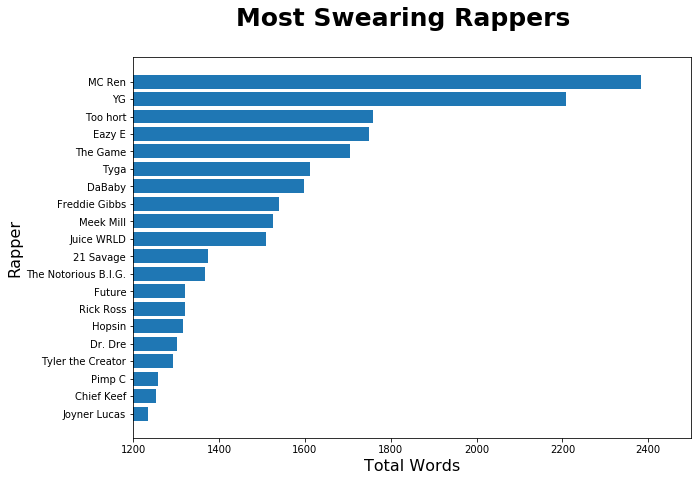

In [18]:
height = data_dtm[new_s_words].sum(axis=1).sort_values()[-20:].values 
bars = (data_dtm[new_s_words].sum(axis=1).sort_values()[-20:].index)

fig, ax = plt.subplots(figsize=(10, 7))
ax.barh(bars, height)
fig.suptitle('Most Swearing Rappers', fontsize=25, fontweight='bold')

plt.xlabel('Total Words', fontsize=16)
plt.xlim([1200, 2500])
plt.ylabel('Rapper', fontsize=16)
 
plt.show()

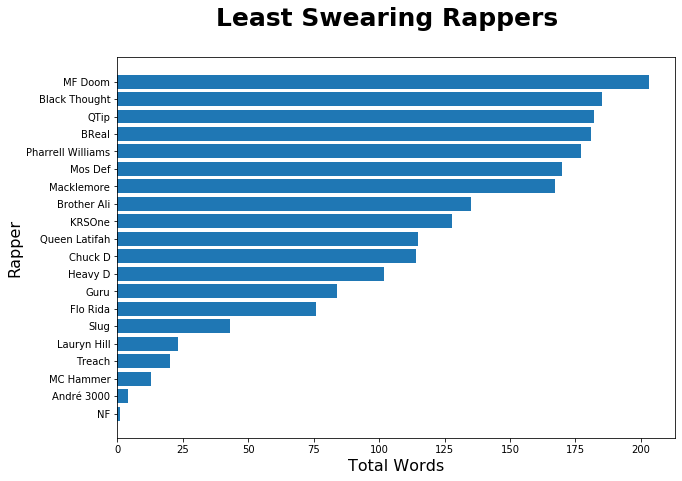

In [19]:
height = data_dtm[new_s_words].sum(axis=1).sort_values()[:20].values 
bars = (data_dtm[new_s_words].sum(axis=1).sort_values()[:20].index)

fig, ax = plt.subplots(figsize=(10, 7))
ax.barh(bars, height)

fig.suptitle('Least Swearing Rappers', fontsize=25, fontweight='bold')
plt.xlabel('Total Words', fontsize=16)
plt.ylabel('Rapper', fontsize=16)

plt.show()

## Which rappers use the largest vocabulary?

In [20]:
# Find the number of unique words that each rapper uses

cv = CountVectorizer(stop_words='english', binary=True)
data_cv = cv.fit_transform(data2.lyrics)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data2.index

In [21]:
count_word_df = data_dtm.sum(axis=1)
count_word_df.sort_values(ascending = False)[:30]

Royce da 59           4882
Eminem                4621
Immortal Technique    4565
Black Thought         4519
Ghostface Killah      4482
Tech N9ne             4379
Lupe Fiasco           4373
GZA                   4345
MF Doom               4168
Apathy                4156
The Game              4129
Lil Dicky             4025
Kool Keith            4020
Talab Kweli           3979
Nas                   3964
Raekwon               3917
Kendrick Lamar        3871
AbSoul                3870
Busta Rhymes          3826
Redman                3826
Big Pun               3818
Rittz                 3816
Camron                3788
LL Cool J             3775
RZA                   3757
Inspectah Deck        3724
E40                   3682
Fat Joe               3659
Hopsin                3590
Twista                3552
dtype: int64

Eminem and Royce da 5'9" are the rappers how use the largets vucabulary in thier songs. Eminem known with his rapping technique which include complex rhyme schemes, bending words so they rhyme, multisyllabic rhymes, many rhymes to a bar, complex rhythms, clear enunciation and the use of melody and syncopation. 

In addition to his solo career, Eminem was a member of the hip hop group D12. He is also known for collaborations with fellow Detroit-based rapper Royce da 5'9" (which he is the first place in the list), The two are collectively known as Bad Meets Evil.

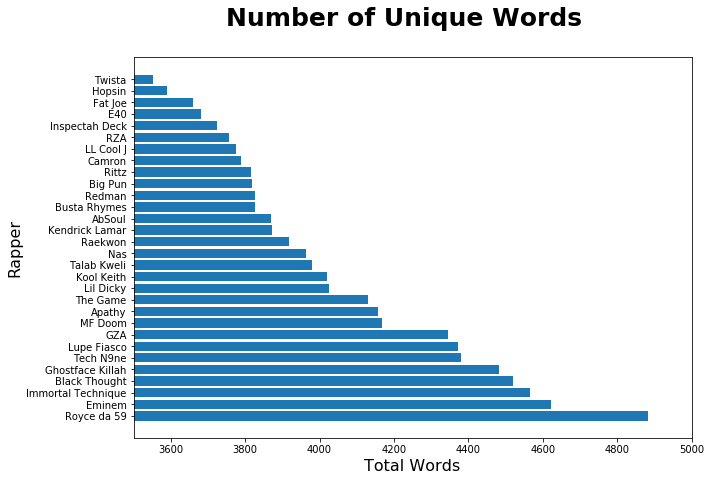

In [22]:
height = count_word_df.sort_values(ascending = False)[:30].values 
bars = (count_word_df.sort_values(ascending = False)[:30].index)

fig, ax = plt.subplots(figsize=(10, 7))
ax.barh(bars, height)

fig.suptitle('Number of Unique Words', fontsize=25, fontweight='bold')
plt.xlabel('Total Words', fontsize=16)
plt.xlim([3500, 5000])
plt.ylabel('Rapper', fontsize=16)
 
plt.show()

## What are the most common words?

Finding the most common words can help us understand what the subjects the rapper usually talks about and what topics are important for him. 

In order to make it readable, I'm taking my 6 favorite rappers from the list and we are going to analyze just them.
The rappers: '2Pac', '50 Cent', 'Drake', 'The Notorious B.I.G.', 'Eminem', 'Snoop Dogg'.

furthermore, I'm going to exclude cursing and a few words that bring us no information and add them to the "stop_words".

In [23]:
favorite_rappers = ['2Pac', '50 Cent', 'Drake', 'The Notorious B.I.G.', 'Eminem', 'Snoop Dogg']

add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'people', 'let', 'bam', 'gon', 'di', 't','ive',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said', 'say', 'tell', 'new', 'odd', 'things',
                  'aint', 'wanna', 'want', 'caus', 'need', 'make', 'yo', 'ey', 'ima', 'nothin', 'gd', 'lets', 'id',
                  'em', 'come', 'gotta', 'ya', 'look', 'cause', 'uhhuh','dogg', 'snp', 'doggy','biggie','big' ,'way',
                  'man', 'know','things','let', 'u', 'ur', 'ill', 'w','n', 'ure','urs', 'lk', 'tryna',
                  'did', 'es', 'da', 'll', 'lil', 'right']

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words,s_words)


# A document-term matrix exclude the new stop words. 

cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data.lyrics)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data.index


In [24]:
top_dict = {}
for c in favorite_rappers:
    top = data_dtm.T[c].sort_values(ascending=False).head(100)
    top_dict[c]= list(zip(top.index, top.values))

In [25]:
for rapper, top_words in top_dict.items():
    print(rapper)
    print(', '.join([word for word, count in top_words[0:20]]))
    print('---')

2Pac
life, die, love, god, baby, live, world, thug, gettin, game, feel, enemies, better, la, ride, day, round, days, real, pain
---
50 Cent
money, love, head, girl, boy, hit, baby, friend, mie, od, run, life, little, bit, whip, pop, club, best, stop, play
---
Drake
love, girl, real, money, guess, suld, bout, feel, really, started, wle, thing, lot, dedicate, theget, used, ld, days, life, care
---
The Notorious B.I.G.
love, die, nasty, hit, day, going, baby, used, live, money, funk, game, bone, high, uhh, mad, cali, grab, dead, smalls
---
Eminem
love, feel, til, shady, superman, slim, better, little, world, day, guess, stand, hes, wont, baby, kill, rap, life, try, everybody
---
Snoop Dogg
baby, run, gangsta, real, girl, roll, play, imagine, love, water, drippin, money, smoke, drop, hit, life, bout, dog, running, ride
---


We can learn from these simple counts whats the major topics each rapper rap about.

- 2Pac rap about dying and his enemies and being a thug and the pain in the world but also about god and love.
- The Notorious B.I.G. mention a lot of dying concepts (he even has a song called "suicidal thoughts").
- 50 Centa and Drake talking about money and parties in clubs and girls and friends.
- Snoop Dogg rap about being a gangster and smoking (probably weed).

2Pac and B.I.G. talk about dying in their songs and eventually, they both got shot and died young (maybe they saw it coming...) 

## Visualization With Word Cloud

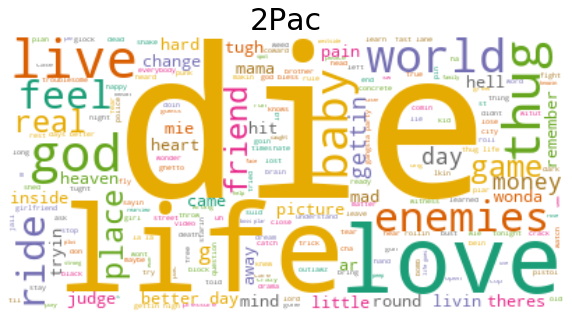

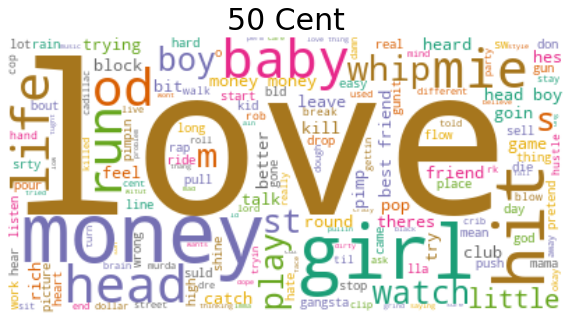

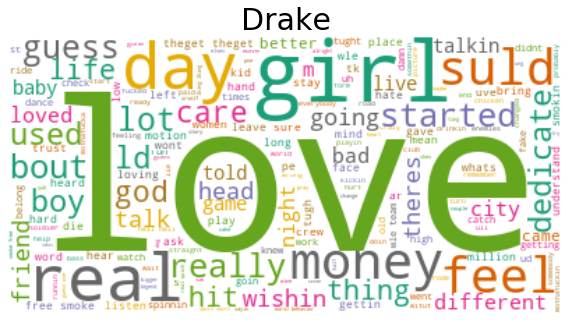

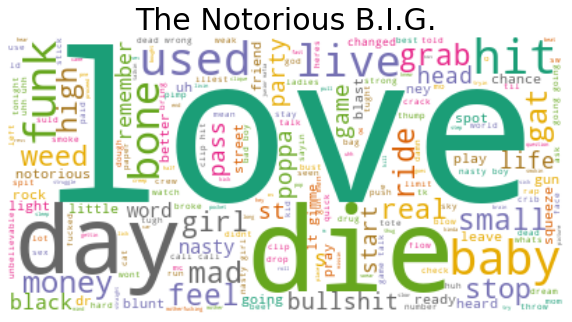

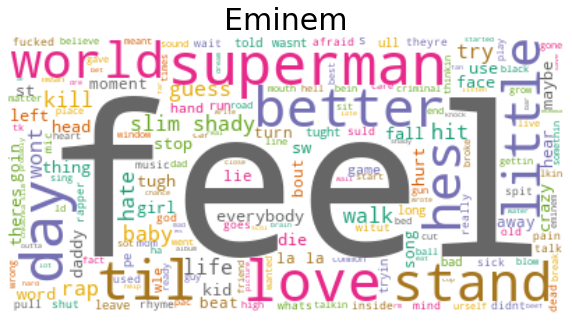

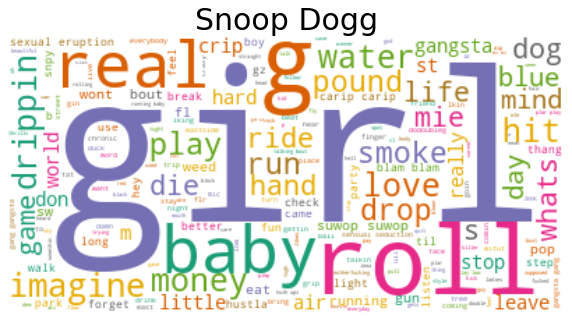

In [26]:
plt.rcParams['figure.figsize'] = [10, 8]

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)


# Create subplots for each rapper
for i, rapper in enumerate(data_dtm.T[favorite_rappers]):
    wc.generate(data.lyrics[rapper])
    
    #plt.subplot(3, 2, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(rapper,fontsize=30)
    
    plt.show()

# Sentiment Analysis

Sentiment analysis is a popular technique when dealing with text data. 
Here are a few key points to know with sentiment analysis:

- TextBlob Module: Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels. 


- Sentiment Labels: Each word in a corpus can be labeled in terms of polarity and subjectivity. A corpus' sentiment is the average of these.


    - Polarity: How positive or negative a word is (Ranges from -1 to 1).

    - Subjectivity: How subjective, or opinionated a word is (Ranges from 0 - a fact to 1 - an opinion).

Here is a short example of how it works: 

In [27]:
# Example
sentences1 = "Ok, I think I like chinese food, it has good flavors. I think we should make the order"

sentences2 = "This smartphone is not good at all. Bad quality, no clarity, I spent my money on garbage."

blob1 = TextBlob(sentences1)
print(blob1.sentiment)

blob2 = TextBlob(sentences2)
print(blob2.sentiment)

Sentiment(polarity=0.39999999999999997, subjectivity=0.3666666666666667)
Sentiment(polarity=-0.3833333333333333, subjectivity=0.45555555555555555)


In [28]:
sub_check = lambda x: TextBlob(x).sentiment.subjectivity
pol_check = lambda x: TextBlob(x).sentiment.polarity

data2['subjectivity'] = data2['lyrics'].apply(sub_check)
data2['polarity'] = data2['lyrics'].apply(pol_check)

In [29]:
positive = data2.sort_values(['polarity'])[-20:]
negative = data2.sort_values(['polarity'])[:20]

Here we can see that Heavy D, Flo Rida, Lauryn Hill and André 3000 are the most positive rappers (by their lyrics), \
which is no surprise to see Flo Rida (how has a lot of main steam and dance songs) and André 3000 (with "happy" songs like "Hey Ya"). \
As expected rappers like Pharrell Williams (with songs like "Happy") and Kanye West are also getting into this list. 

The only surprise here is that Lil Jon is not included, which he is known as a rapper how sings about parties and fun.

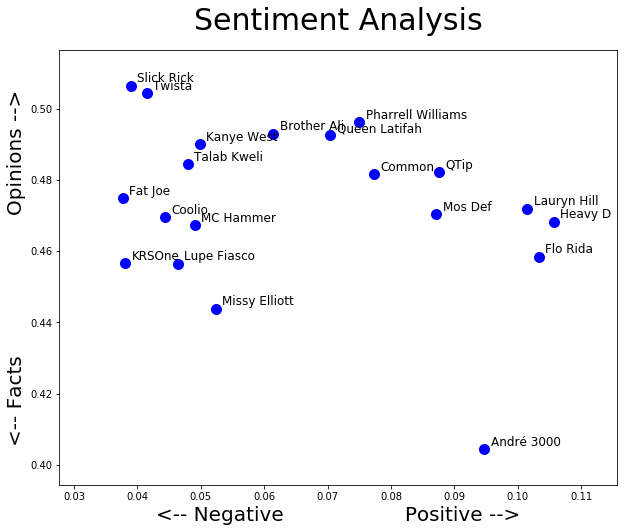

In [30]:
fig, ax = plt.subplots(figsize=(10, 8))

for index, rapper in enumerate(positive.index):
    x = positive.loc[rapper,'polarity']
    y = positive.loc[rapper, 'subjectivity']
    plt.scatter(x, y, color='blue', s=100)
    plt.text(x+.001, y+.001, positive['name'][index], fontsize=12)
    plt.xlim(positive['polarity'].min()-0.01, positive['polarity'].max()+0.01) 
    plt.ylim(positive['subjectivity'].min()-0.01, positive['subjectivity'].max()+0.01) 

    
plt.title('Sentiment Analysis', fontsize=30, pad=20)
plt.xlabel('<-- Negative                   Positive -->', fontsize=20)
plt.ylabel('<-- Facts                      Opinions -->', fontsize=20)

plt.show()

Here in the "negative" rappers, we have got something interesting.
The most negative rappers are MC Ren, Eazy E, Ice Cube and they all were members of the pioneering gangsta rap group [N.W.A.](https://en.wikipedia.org/wiki/N.W.A).

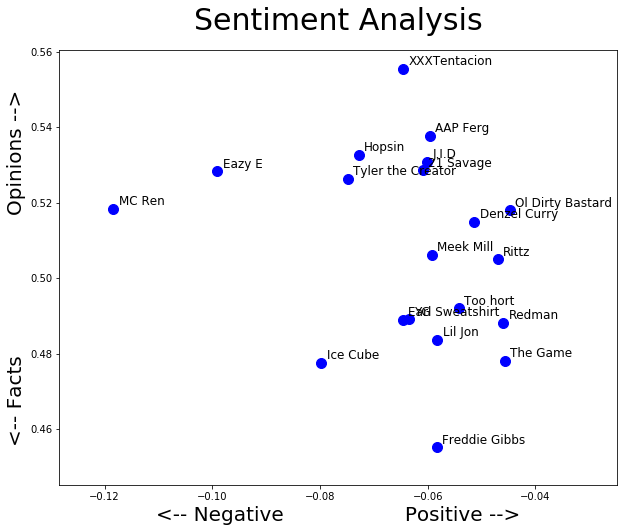

In [31]:
fig, ax = plt.subplots(figsize=(10, 8))

for index, rapper in enumerate(negative.index):
    x = negative.loc[rapper,'polarity']
    y = negative.loc[rapper, 'subjectivity']
    plt.scatter(x, y, color='blue', s=100)
    plt.text(x+.001, y+.001, negative['name'][index], fontsize=12)
    plt.xlim(negative['polarity'].min()-0.01, negative['polarity'].max()+0.02) 
    plt.ylim(negative['subjectivity'].min()-0.01, negative['subjectivity'].max()+0.005) 

    
plt.title('Sentiment Analysis', fontsize=30, pad=20)
plt.xlabel('<-- Negative                   Positive -->', fontsize=20)
plt.ylabel('<-- Facts                      Opinions -->', fontsize=20)

plt.show()

# Recommendation System

## Preprocessing

TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

It has many uses, most importantly in automated text analysis, and is very useful for scoring words in machine learning algorithms for Natural Language Processing (NLP).


The formula behind the TF-IDF statistical measure:

 - N is the number of documents we have in our dataset
 - d is a given document from our dataset
 - D is the collection of all documents
 - w is a given word in a document
 

TF(w,d) = log(1 + frequency(w,d)) 

IDF(w,D) = log(N / frequency(w,D))

TF-IDF(w,d,D) = TF(w,d) * IDF(w,D)

In [32]:
tfid = TfidfVectorizer(stop_words='english')
data_tfid = tfid.fit_transform(data.lyrics)
data_dtm = pd.DataFrame(data_tfid.toarray(), columns=tfid.get_feature_names())
data_dtm.index = data.index

## The Model 

After using TF-IDF I'm using K-Nearest Neighbors (KNN) to find the 5 closest rappers to the rapper we want, based on their new word vector. 

In [33]:
# calculate the Euclidean distance between two vectors
def euclidean_distance(rapper1, rapper2):
    distance = 0.0
    for i in range(len(rapper1)-1):
        distance += (rapper1[i] - rapper2[i])**2
    return (distance)**0.5

# Locate the most similar neighbors
def get_neighbors(df, rapper, num_neighbors=5, distances_type = 'euclidean'):
    distances = {}
    
    if distances_type == 'euclidean':
        for index, rapper_neighbors in df.iterrows():
            dist = euclidean_distance(df.loc[rapper], rapper_neighbors)
            distances[index] = dist
        
        distances = sorted(distances, key=distances.get)[1:6]
    
    elif distances_type == 'cosine_similarity':
        target = df.index.get_loc(rapper)
        for score, name in enumerate(df.index):
            distances[name] = cosine_similarity(df)[target][score]
            
        distances = sorted(distances, key=distances.get, reverse=True)[1:6]
        
    return distances

Checking the model on 50 Cent, Drake, Dr. Dre, The Notorious B.I.G. and 2Pac.

In [34]:
fifty_recommendation = get_neighbors(data_dtm,'50 Cent',distances_type = 'euclidean')  
fifty_recommendation 

['Lloyd Banks', 'The Game', 'Meek Mill', 'DaBaby', 'J. Cole']

In [35]:
darke_recommendation = get_neighbors(data_dtm,'Drake',distances_type = 'euclidean') 
darke_recommendation

['J. Cole', 'Fabolous', 'Big Sean', 'Meek Mill', 'Polo G']

In [36]:
big_recommendation = get_neighbors(data_dtm,'The Notorious B.I.G.',distances_type = 'euclidean')
big_recommendation

['50 Cent', 'Diddy', 'Dr. Dre', 'Hopsin', 'Proof']

In [37]:
dre_recommendation = get_neighbors(data_dtm,'Dr. Dre',distances_type = 'euclidean')
dre_recommendation 

['The Game', 'Meek Mill', 'J. Cole', '50 Cent', 'DMX']

In [38]:
pac_recommendation = get_neighbors(data_dtm,'2Pac',distances_type = 'euclidean')
pac_recommendation

['J. Cole', 'Scarface', '50 Cent', 'The Game', 'Jadakiss']

## How to check if it is a good result?

In order to check the result, I can't rely on my own knowledge alone, so I decided to make a comparison with the best in the field - Spotify.

Spotify becomes so successful because of its recommendation algorithm so I think it's a good idea to check what Spotify recommending when I search for a rapper name and look in the "Fan Also Like" section. 

In [39]:
fifty_recommendation

['Lloyd Banks', 'The Game', 'Meek Mill', 'DaBaby', 'J. Cole']

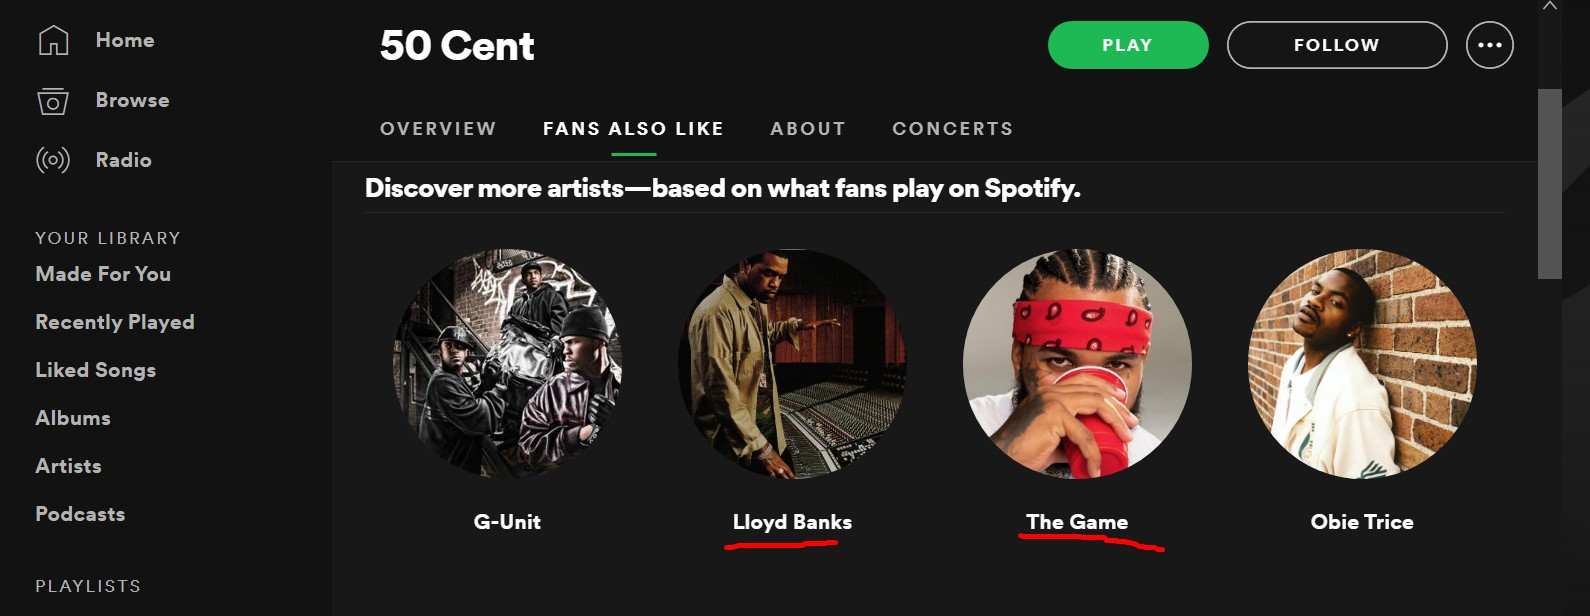

In [40]:
Image(filename=r'C:\Users\tomer\Desktop\50cent.jpg')

In [41]:
darke_recommendation

['J. Cole', 'Fabolous', 'Big Sean', 'Meek Mill', 'Polo G']

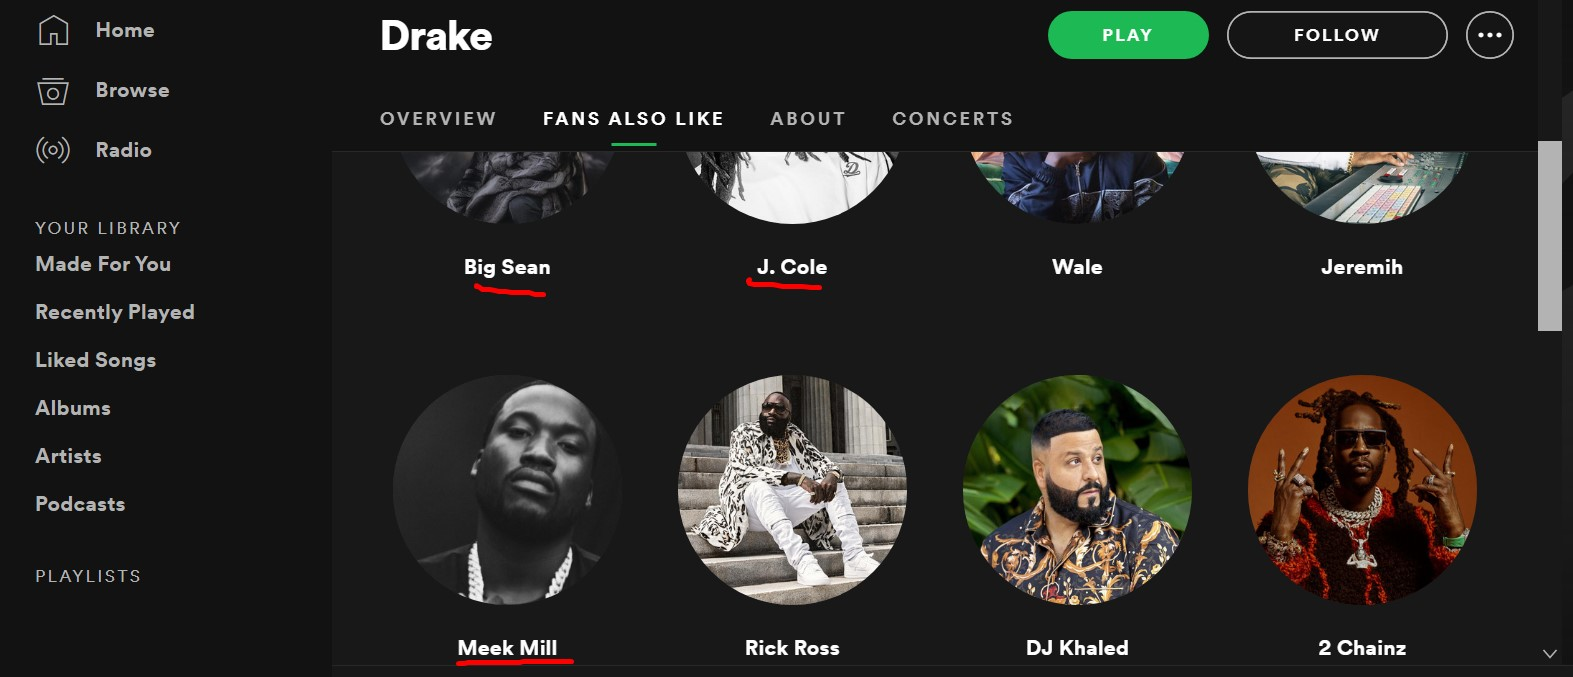

In [42]:
Image(filename=r'C:\Users\tomer\Desktop\drake.jpg')

In [43]:
big_recommendation

['50 Cent', 'Diddy', 'Dr. Dre', 'Hopsin', 'Proof']

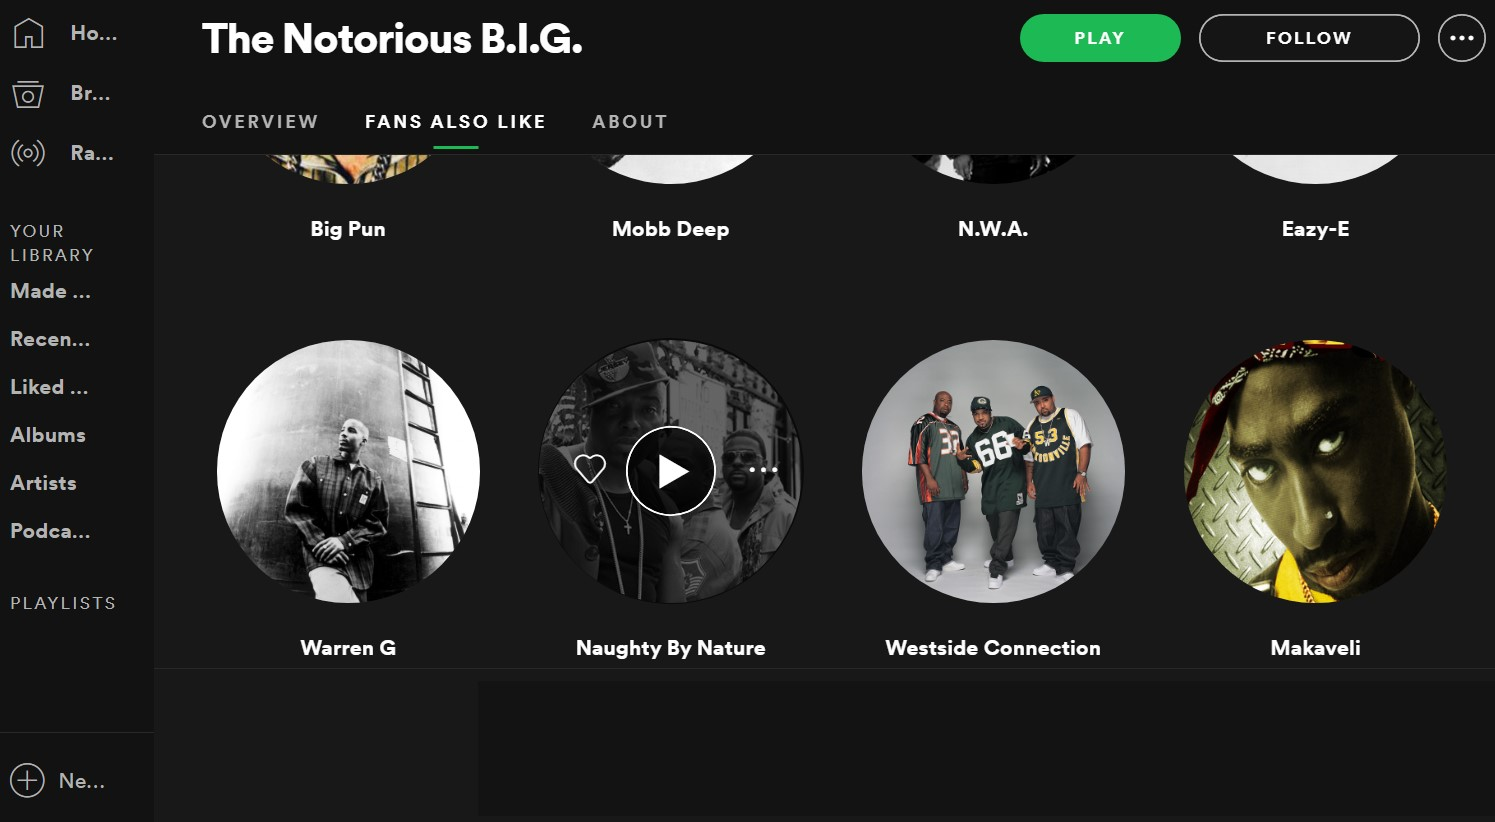

In [44]:
Image(filename=r'C:\Users\tomer\Desktop\big.jpg')

In [45]:
dre_recommendation

['The Game', 'Meek Mill', 'J. Cole', '50 Cent', 'DMX']

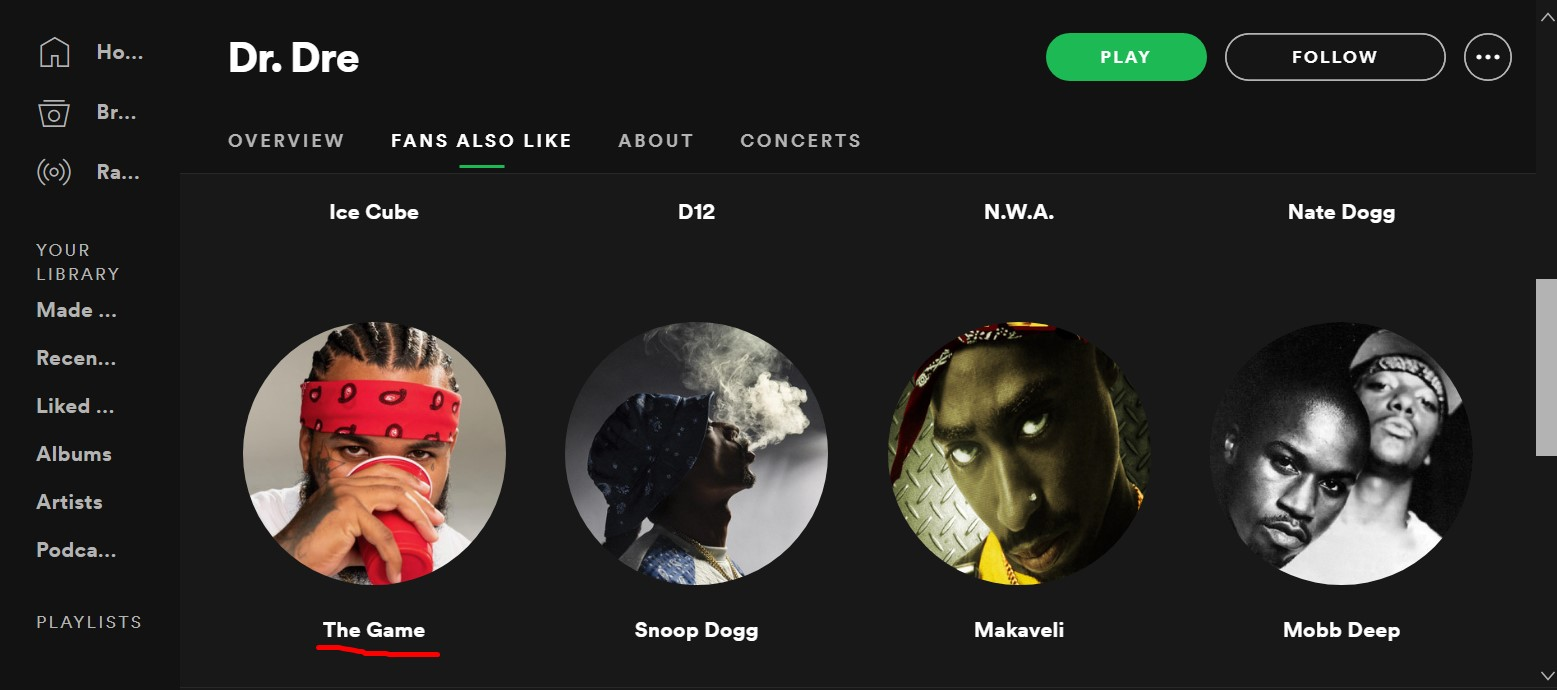

In [46]:
Image(filename=r'C:\Users\tomer\Desktop\dre1.jpg')

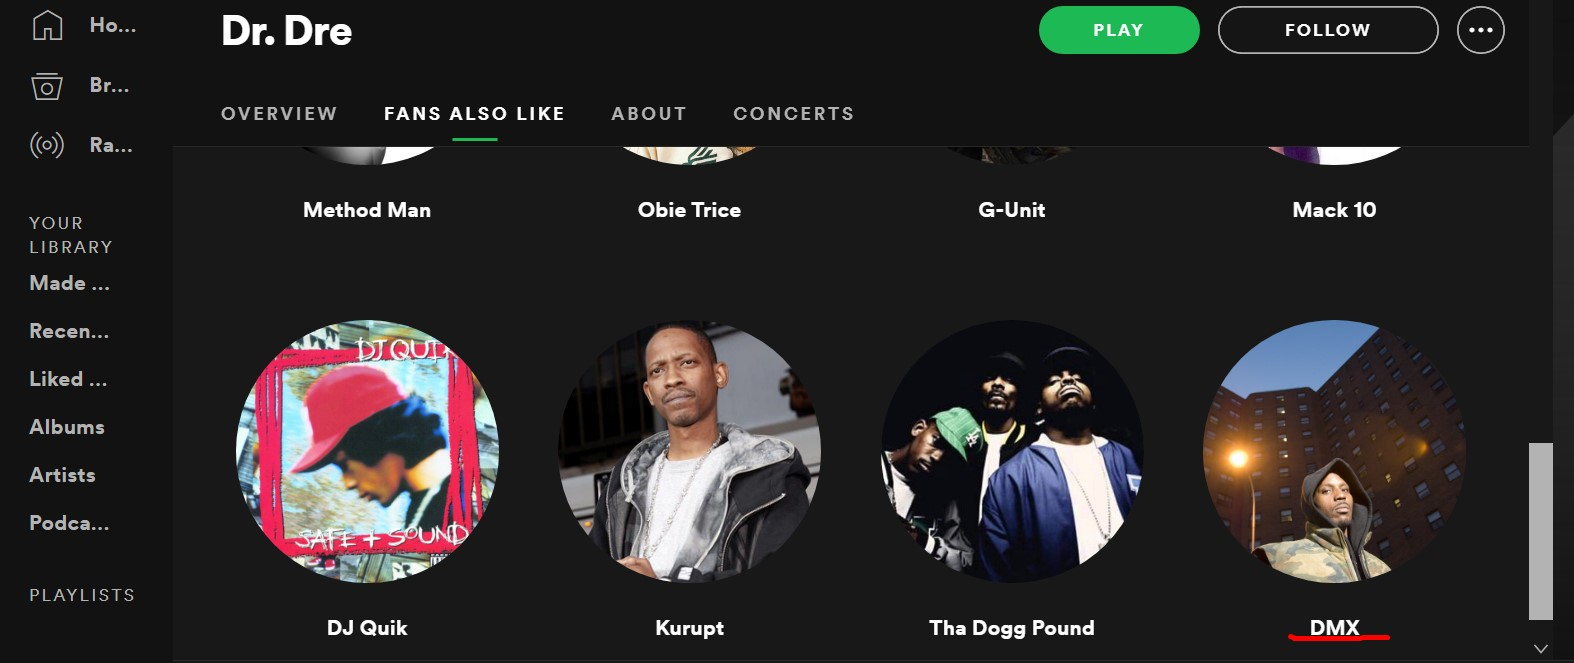

In [47]:
Image(filename=r'C:\Users\tomer\Desktop\dre2.jpg')

In [48]:
pac_recommendation

['J. Cole', 'Scarface', '50 Cent', 'The Game', 'Jadakiss']

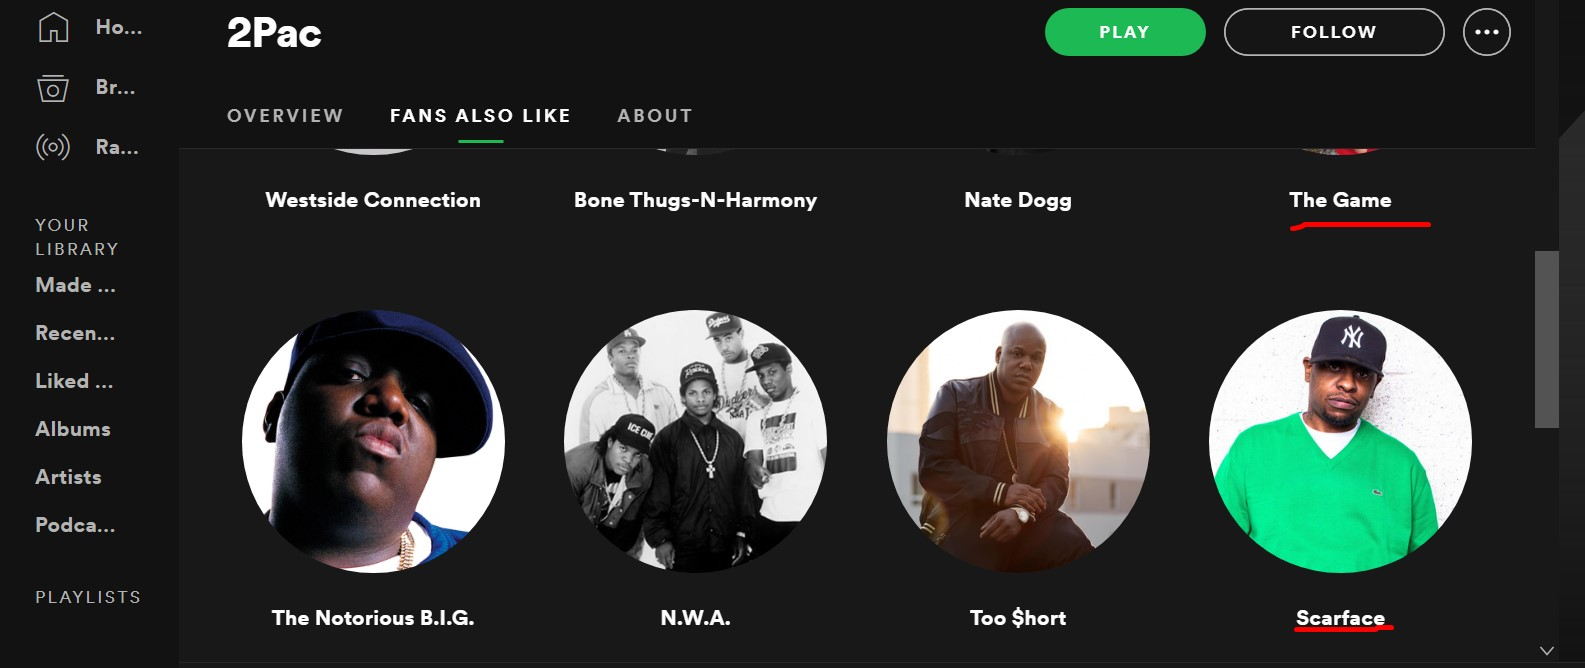

In [49]:
Image(filename=r'C:\Users\tomer\Desktop\2pac.jpg')

## Summary

Our recommendation system works pretty well!
especially for 50 Cent and Drake, it also works well for Dr. Dre even so I wanted to see rappers like Snoop Dogg, Eminem, or any N.W.A member like Eazy-E or Ice Cube in our recommendation. 

Regarding 2pac and B.I.G our model performed not so well.
But according to my knowledge, I expected to see from Spotify the appearance of P. Diddy name when I searched for B.I.G (like our model) and didn't see that.  